<a href="https://colab.research.google.com/github/jakewalter/frontiers_geophysics/blob/main/earthquake_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
               network: AM
               station: REDD6
              location: 00
               channel: SHZ
             starttime: 2023-03-17T07:13:24.662000Z
               endtime: 2023-03-17T07:13:45.662000Z
         sampling_rate: 50.0
                 delta: 0.02
                  npts: 1051
                 calib: 1.0
_fdsnws_dataselect_url: https://fdsnws.raspberryshakedata.com/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'D', 'number_of_records': 4, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 2048})
            processing: ['ObsPy 1.4.0: trim(endtime=UTCDateTime(2023, 3, 17, 7, 13, 45, 662000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2023, 3, 17, 7, 13, 24, 662000))']


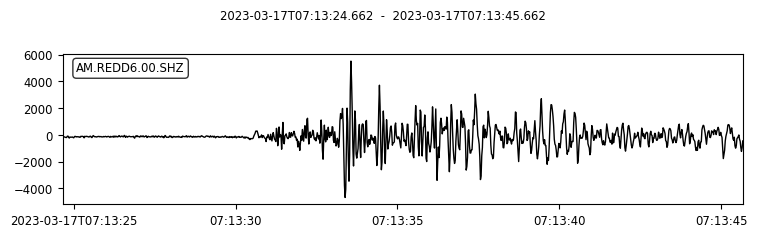

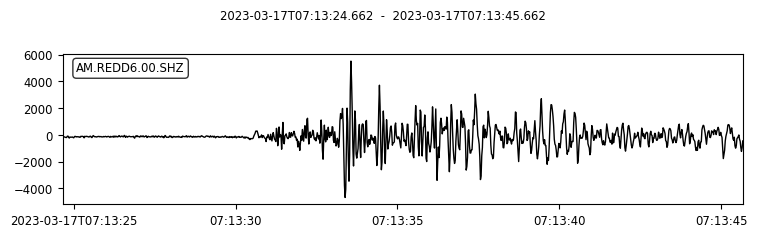

In [ ]:
!pip install obspy

from obspy import UTCDateTime
from obspy.clients.fdsn import Client

##### Find the time of the earthquake from https://wichita.ogs.ou.edu/staff/earthquake/events.html or https://earthquake.usgs.gov/
starttime = UTCDateTime("2023-03-17T07:13:24.67")
endtime = UTCDateTime("2023-03-17T07:13:45.67")

##### Choose a station https://stationview.raspberryshake.org/
sta1a = 'REBE1'
client = Client('RASPISHAKE')

##### Download waveforms
tr = client.get_waveforms(network='*', station=sta1a, location='*', channel='SHZ', starttime=starttime, endtime=endtime)
print(tr[0].stats)

##### Plot waveforms
tr.plot()
